In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path="C:\\Users\\ACER\\OneDrive\\Documents\\training\\Fraud.csv"
df=pd.read_csv(file_path)
df.shape

(6362620, 11)

In [3]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

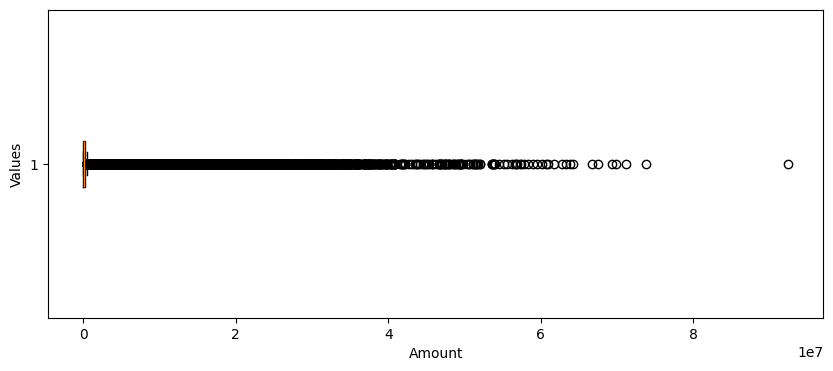

In [9]:
#finding outliers

plt.figure(figsize=(10,4))
plt.boxplot(df['amount'],vert=False)

plt.xlabel('Amount')
plt.ylabel('Values')

plt.show()

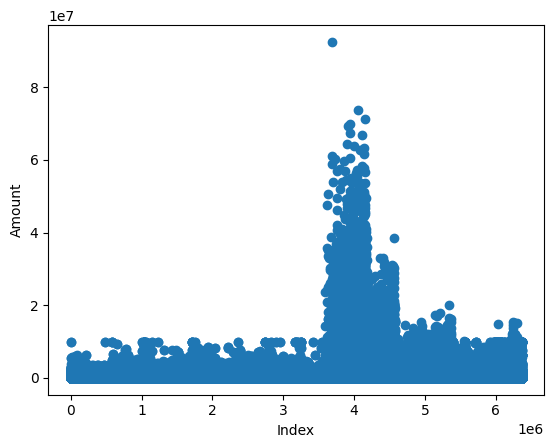

In [10]:
plt.scatter(df.index,df['amount'])

plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

In [11]:
#Finding outliers using IQR method

Q1=df['amount'].quantile(0.25)
Q3=df['amount'].quantile(0.75)
IQR=Q3-Q1

lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)

outliers= df[(df['amount']< lb) | (df['amount']>ub)]

print("Outliers are : ")
print(outliers)

Outliers are : 
         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86               

In [12]:
outliers.shape

(338078, 11)

In [13]:
print(len(outliers[outliers.isFraud==1]))

3854


In [14]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])

legper=(legit/(fraud+legit))*100
fradper=(fraud/(fraud+legit))*100


print("Number of Legit Transactions : ",legit)
print("Number of Fraud Transactions : ",fraud)

print("Percentage of Fraud Transaction : ",fradper)
print("Percentage of Legit transaction : ",legper)

Number of Legit Transactions :  6354407
Number of Fraud Transactions :  8213
Percentage of Fraud Transaction :  0.12908204481801522
Percentage of Legit transaction :  99.87091795518198


In [15]:
# To remove the outliers only perform this snippet.
# I personally recommend not to do it as the outliers are probabily fraud ones and needs to be kept to identify the fraud ones
# remove the '#' symbol of the below statement to remove the outliers


#df=df.drop(outliers.index)
#df.reset_index(drop=True, inplace=True)

([<matplotlib.patches.Wedge at 0x1bc01f3d2d0>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.8709%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1291%')])

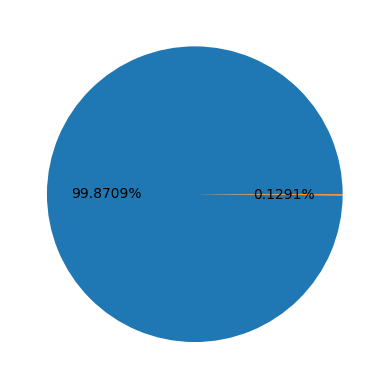

In [16]:
plt.pie(df['isFraud'].value_counts(), autopct='%.4f%%')

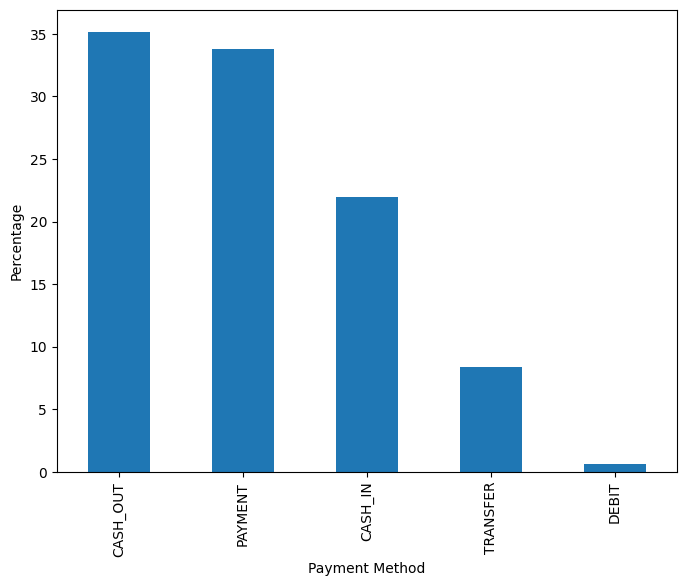

In [17]:

payment_counts = df['type'].value_counts()


payment_percentage = (payment_counts / payment_counts.sum()) * 100


plt.figure(figsize=(8,6))
payment_percentage.plot(kind='bar')


plt.xlabel('Payment Method')
plt.ylabel('Percentage')


plt.show()


type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: count, dtype: float64


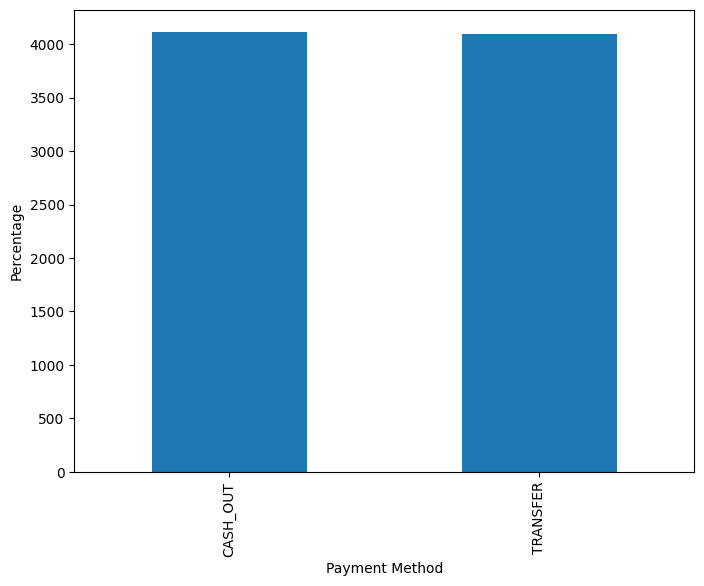

In [18]:
fraud_df=df[df['isFraud']==1]
legit_df=df[df['isFraud']==0]

payment_counts_fraud=fraud_df['type'].value_counts()
payment_percentage_fraud=(payment_counts_fraud/payment_counts_fraud.sum())*100

print(payment_percentage_fraud)
plt.figure(figsize=(8,6))
payment_counts_fraud.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel('Percentage')

plt.show()

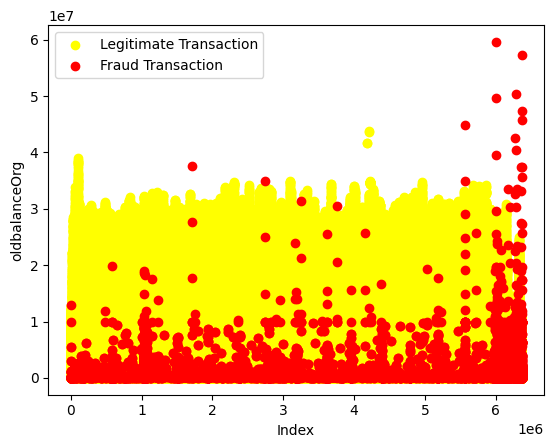

In [19]:
plt.scatter(legit_df.index, legit_df['oldbalanceOrg'], color='yellow', label='Legitimate Transaction')
plt.scatter(fraud_df.index, fraud_df['oldbalanceOrg'], color='red', label='Fraud Transaction')
plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')

plt.legend()

plt.show()



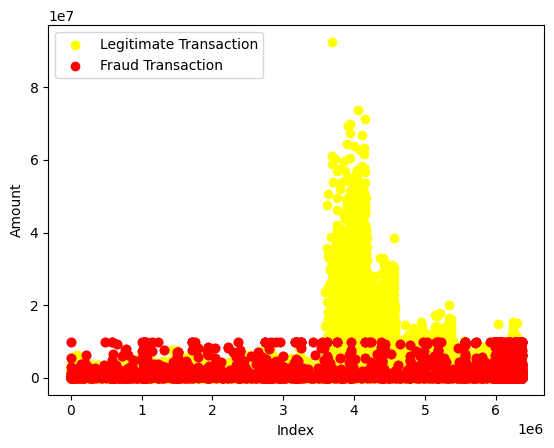

In [21]:
plt.scatter(legit_df.index, legit_df['amount'], color='yellow', label='Legitimate Transaction')
plt.scatter(fraud_df.index, fraud_df['amount'], color='red', label='Fraud Transaction')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.legend()

plt.show()


In [35]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
obJList=new_df.select_dtypes(include="object").columns
print(obJList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [37]:
from sklearn.preprocessing import LabelEncoder

# Ensure obJList is defined with the correct column names
obJList = new_df.select_dtypes(include="object").columns
print(obJList)

label_encoder = LabelEncoder()

# Transform each column listed in obJList
for col in obJList:
    new_df[col] = label_encoder.fit_transform(new_df[col].astype(str))

print(new_df.info())
new_df.head()



Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


<Axes: >

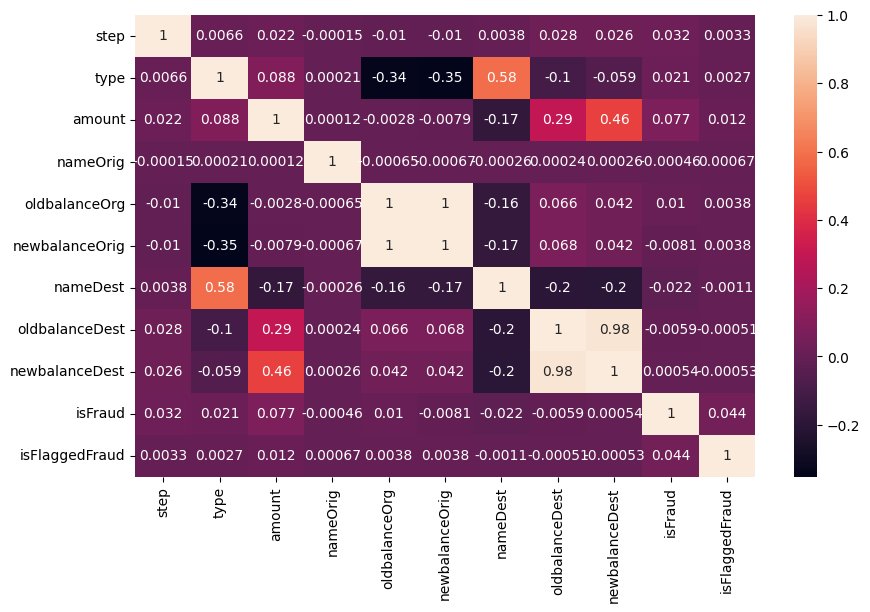

In [38]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [40]:
new_df['Amount_Orig']=new_df.apply(lambda x: x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
new_df['Amount_Dest']=new_df.apply(lambda x: x['oldbalanceDest']-x['oldbalanceDest'],axis=1)

new_df=new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,2.044744
1,type,2.029054
2,amount,1.100597
3,isFraud,1.167825
4,isFlaggedFraud,1.002344
5,Amount_Orig,1.253019
6,Amount_Dest,NaN


<Axes: >

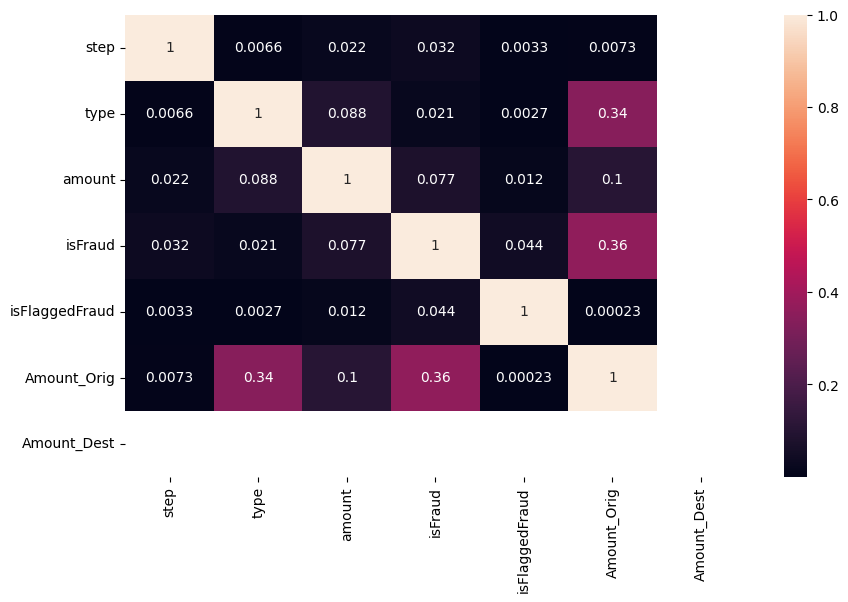

In [41]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [42]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,Amount_Orig,Amount_Dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,0.0
4,1,3,11668.14,0,0,11668.14,0.0


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
scaler=StandardScaler()
new_df["Normalized_Amount"]=scaler.fit_transform(new_df["amount"].values.reshape(-1,1))
new_df["Normalized_step"]=scaler.fit_transform(new_df["step"].values.reshape(-1,1))
new_df["Normalized_type"]=scaler.fit_transform(new_df["type"].values.reshape(-1,1))
new_df["Normalized_Account_orig"]=scaler.fit_transform(new_df["Amount_Orig"].values.reshape(-1,1))
new_df["Normalized_Account_Dest"]=scaler.fit_transform(new_df["Amount_Dest"].values.reshape(-1,1))
new_df.drop(["amount","step","type","Amount_Orig","Amount_Dest"], inplace=True, axis=1)

new_df.head()

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized_type,Normalized_Account_orig,Normalized_Account_Dest
0,0,0,-0.281560,-1.703042,0.952399,0.211876,0.0
1,0,0,-0.294767,-1.703042,0.952399,0.157490,0.0
2,1,0,-0.297555,-1.703042,1.693076,0.146011,0.0
3,1,0,-0.297555,-1.703042,-0.528954,0.146011,0.0
4,0,0,-0.278532,-1.703042,0.952399,0.224345,0.0


In [45]:
Y=new_df["isFraud"]
X=new_df.drop(["isFraud"],axis=1)

(X_train, X_test, Y_train, Y_test)= train_test_split(X,Y,test_size=0.2,random_state=22)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (5090096, 6)
Shape of X_test:  (1272524, 6)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg=LogisticRegression(C=0.001,penalty="l2")
log_reg.fit(X_train,Y_train)

y_pred=log_reg.predict(X_test)
logic_regression_score=log_reg.score(X_test, Y_test)*100

In [47]:
decision_tree=DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(X_train,Y_train)

Y_pred_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test,Y_test)*100

In [48]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

Y_pred_rf=random_forest.predict(X_test)
random_forest_score=random_forest.score(X_test,Y_test)*100

In [49]:
print("Random Forest Score : ",random_forest_score)
print("Decision Tree Score : ",decision_tree_score)
print("Logic Regression Score : ",logic_regression_score)

Random Forest Score :  99.93084609799108
Decision Tree Score :  99.9023201134124
Logic Regression Score :  99.9100999273884


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.54      0.67      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.77      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Random Forest


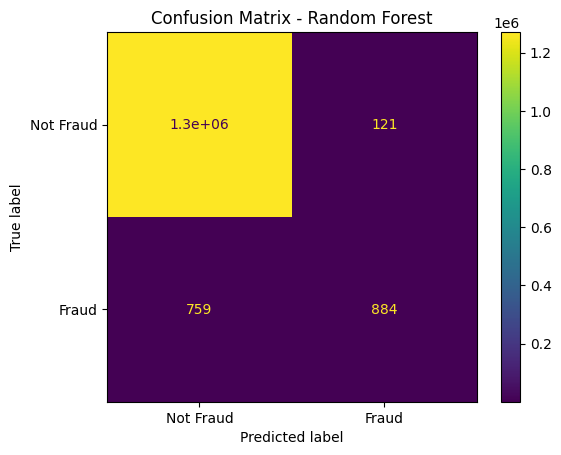

In [50]:
classification_report_rf=classification_report(Y_test,Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

confusion_matrix_rf=confusion_matrix(Y_test,Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
display_labels=['Not Fraud','Fraud']
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

precision_random_forest = precision_score(Y_test,Y_pred_rf)
recall_random_forest=recall_score(Y_test,Y_pred_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.63      0.60      0.61      1643

    accuracy                           1.00   1272524
   macro avg       0.81      0.80      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Decision Tree


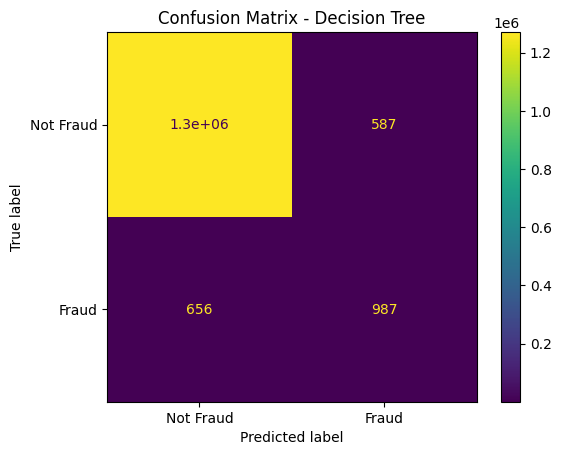

In [51]:
classification_report_dt=classification_report(Y_test,Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

confusion_matrix_dt=confusion_matrix(Y_test,Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

precision_decison_tree=precision_score(Y_test,Y_pred_dt)
recall_decision_tree=recall_score(Y_test,Y_pred_dt)

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.86      0.36      0.51      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.68      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Logistic Regression


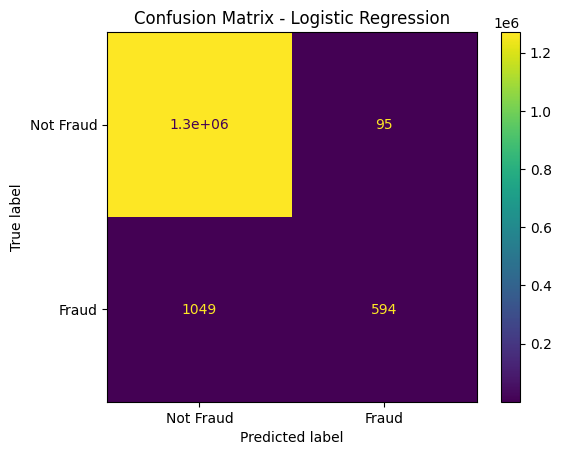

In [52]:
print("Classification Report - Logistic Regression")
print(classification_report(Y_test,y_pred))

confusion_matrix_lr=confusion_matrix(Y_test,y_pred.round())
print("Confusion Matrix - Logistic Regression")
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr,display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

precision_logistic_regression=precision_score(Y_test,y_pred)
recall_logistic_regression=recall_score(Y_test,y_pred)


In [53]:
algorithms=['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracy_scores=[random_forest_score,decision_tree_score,logic_regression_score]
precision_scores=[precision_random_forest,precision_decison_tree,precision_logistic_regression]
recall_scores=[recall_random_forest,recall_decision_tree,recall_logistic_regression]

data={
    'Algorithms': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}

In [54]:
comparision =pd.DataFrame(data)
print(comparision)

            Algorithms   Accuracy  Precision    Recall
0        Random Forest  99.930846   0.879602  0.538040
1        Decision Tree  99.902320   0.627065  0.600730
2  Logistic Regression  99.910100   0.862119  0.361534
